In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("lab09.ipynb")

<img style="display: block; margin-left: auto; margin-right: auto" src="./ccsf-logo.png" width="250rem;" alt="The CCSF black and white logo">

# Lab 09: Regression

## References

* [Sections 15.0 - 15.6 of the Textbook](https://inferentialthinking.com/chapters/15/Prediction.html)
* [datascience Documentation](https://datascience.readthedocs.io/)
* [Python Quick Reference](https://ccsf-math-108.github.io/materials-sp24/resources/quick-reference.html)

## Assignment Reminders

- Make sure to run the code cell at the top of this notebook that starts with `# Initialize Otter` to load the auto-grader.
- For all tasks indicated with a 🔎 that you must write explanations and sentences for, provide your answer in the designated space.
- Throughout this assignment and all future ones, please be sure to not re-assign variables throughout the notebook! _For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Otherwise, you will fail tests that you thought you were passing previously!_
- Collaborating on labs is more than okay -- it's encouraged! You should rarely remain stuck for more than a few minutes on questions in labs, so ask an instructor or classmate for help. (Explaining things is beneficial, too -- the best way to solidify your knowledge of a subject is to explain it.) Please don't just share answers, though.
- View the related <a href="https://ccsf.instructure.com" target="_blank">Canvas</a> Assignment page for additional details.

Run the following cell to set up the lab, and make sure you run the cell at the top of the notebook that initializes Otter.

In [2]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## How Faithful is Old Faithful? 

Old Faithful is a geyser in Yellowstone National Park that is famous for eruption on a fairly regular schedule. Run the cell below to see Old Faithful in action!

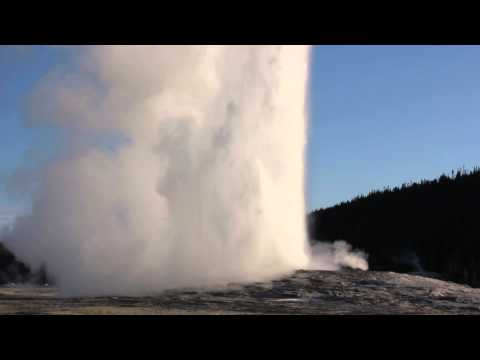

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  Whenever there is a long eruption, it is usually followed by an even longer wait before the next eruption. If you visit Yellowstone, you might want to predict when the next eruption will happen, so that you can see the rest of the park instead of waiting by the geyser.
 
Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- `duration`: Eruption duration, in minutes
- `wait`: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [4]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

### Task 01 📍🔎

Make a scatter plot of the data.  It's conventional to put the column we want to predict on the vertical axis and the other column on the horizontal axis.


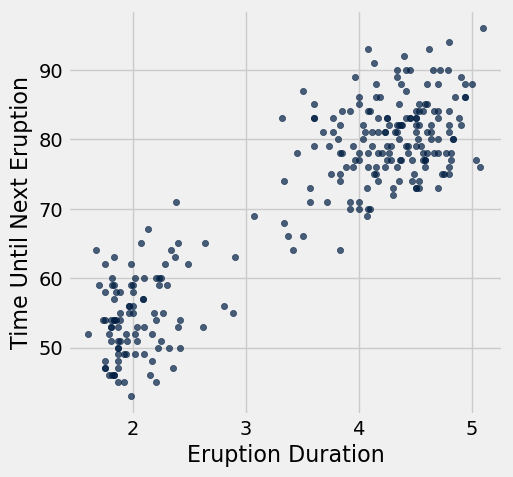

In [8]:
faithful.scatter('duration', 'wait')
plt.xlabel('Eruption Duration')
plt.ylabel('Time Until Next Eruption')
plt.show()

### Task 02 📍🔎

<!-- BEGIN QUESTION -->

Are eruption duration and waiting time roughly linearly related based on the scatter plot above? Is this relationship positive?


The scatter plot suggests that the data points are approximately linearly related. Although there appear to be two clusters, they still align along a general linear trend. Relationship is positive.

<!-- END QUESTION -->

We're going to continue with the assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.

We'd next like to plot the data in standard units. If you don't remember the definition of standard units, textbook section [14.2](https://www.inferentialthinking.com/chapters/14/2/Variability.html#standard-units) might help!

### Task 03 📍

Compute the mean and standard deviation of the eruption durations and waiting times.  **Then** create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  The columns should be named `duration (standard units)` and `wait (standard units)`.


In [41]:
duration_mean = np.mean(faithful.column('duration'))
duration_std = np.std(faithful.column('duration'))
wait_mean = np.mean(faithful.column('wait'))
wait_std = np.std(faithful.column('wait'))

duration_standard = (faithful.column('duration') - duration_mean) / duration_std
wait_standard = (faithful.column('wait') - wait_mean) / wait_std

faithful_standard = Table().with_columns(
    "duration (standard units)", duration_standard,
    "wait (standard units)", wait_standard)
faithful_standard


duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


In [11]:
grader.check("task_03")

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your standardized durations seem correct.
task_03 - 2 message: ✅ Your duration_std value seems correct.
task_03 - 3 message: ✅ Your wait_std value seems correct.

### Task 04 📍🔎

Plot the data again, but this time in standard units.


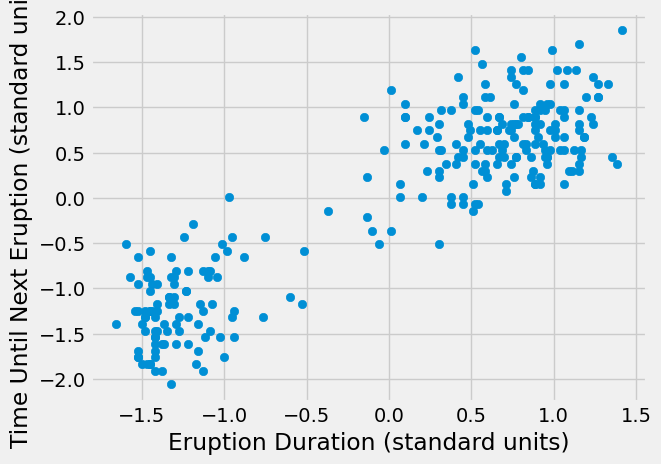

In [10]:
plt.scatter(faithful_standard.column('duration (standard units)'), faithful_standard.column('wait (standard units)'))
plt.xlabel('Eruption Duration (standard units)')
plt.ylabel('Time Until Next Eruption (standard units)')
plt.show()


You'll notice that this plot looks the same as the last one!  However, the data and axes are scaled differently.  So it's important to read the ticks on the axes.

### Task 05 📍

Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

1. -1
2. 0
3. 1

Assign `correlation` to the number corresponding to your guess.


In [16]:
correlation = 3

In [17]:
grader.check("task_05")

task_05 results: All test cases passed!
task_05 - 1 message: ✅

### Task 06 📍

Compute the correlation `r`.  

*Hint:* Use `faithful_standard`.  Section [15.1](https://www.inferentialthinking.com/chapters/15/1/Correlation.html#calculating-r) explains how to do this.



In [20]:
duration_standard = faithful_standard.column('duration (standard units)')
wait_standard = faithful_standard.column('wait (standard units)')
r = np.mean(duration_standard * wait_standard)
r


0.90081116832181318

In [19]:
grader.check("task_06")

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your r value seems correct.

## The regression line

Recall that the correlation is the **slope of the regression line when the data are put in standard units**.

The next cell plots the regression line in standard units:

$$\text{waiting time in standard units} = r \times \text{eruption duration in standard units}.$$

Then, it plots the data in standard units again, for comparison.

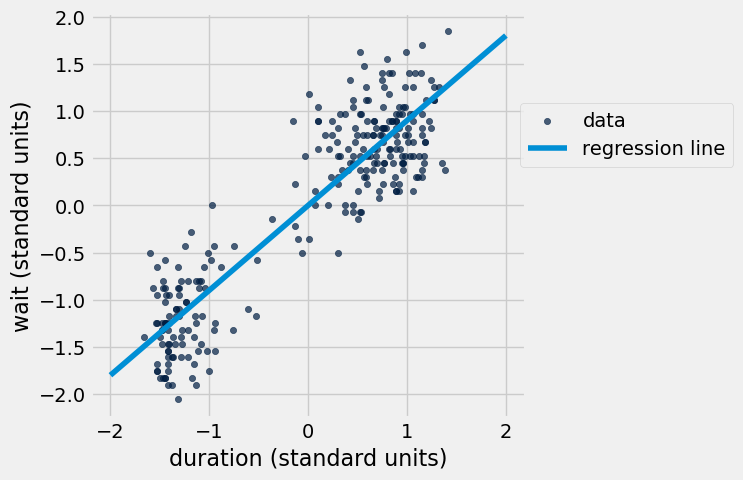

In [21]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line")
    plt.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(faithful_standard, 
                   "duration (standard units)", 
                   "wait (standard units)", 
                   [-2, -2*r], 
                   [2, 2*r])

How would you take a point in standard units and convert it back to original units?  We'd have to "stretch" its horizontal position by `duration_std` and its vertical position by `wait_std`. That means the same thing would happen to the slope of the line.

Stretching a line horizontally makes it less steep, so we divide the slope by the stretching factor.  Stretching a line vertically makes it more steep, so we multiply the slope by the stretching factor.

### Task 07 📍

Calculate the slope of the regression line in original units, and assign it to `slope`.

(If the "stretching" explanation is unintuitive, consult section [15.2](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html#the-equation-of-the-regression-line) in the textbook.)


In [24]:
slope = r * (wait_std / duration_std)
slope

10.729641395133527

In [23]:
grader.check("task_07")

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your slope value could be correct.
task_07 - 2 message: ✅ Your slope value seems to be correct.

We know that the regression line passes through the point `(duration_mean, wait_mean)`.  You might recall from high-school algebra that the equation for the line is therefore:

$$\text{waiting time} - \verb|wait_mean| = \texttt{slope} \times (\text{eruption duration} - \verb|duration_mean|)$$

The rearranged equation becomes:

$$\text{waiting time} = \texttt{slope} \times \text{eruption duration} + (- \texttt{slope} \times \verb|duration_mean| + \verb|wait_mean|)$$

### Task 08 📍

Calculate the intercept in original units and assign it to `intercept`.


In [31]:
intercept = -slope * duration_mean + wait_mean
intercept


33.474397022753351

In [30]:
grader.check("task_08")

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your intercept is within a reasonable interval.
task_08 - 2 message: ✅ Your intercept value seems correct.

## Investigating the regression line

The slope and intercept tell you exactly what the regression line looks like.  To predict the waiting time for an eruption, multiply the eruption's duration by `slope` and then add `intercept`.

### Task 09 📍🔎 

Compute the predicted waiting time for an eruption that lasts 2 minutes, and for an eruption that lasts 5 minutes.


In [32]:
two_minute_predicted_waiting_time = slope * 2 + intercept
five_minute_predicted_waiting_time = slope * 5 + intercept

# Here is a helper function to print out your predictions.
# Don't modify the code below.
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

After an eruption lasting 2 minutes, we predict you'll wait 54.933679813 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.1226039984 minutes until the next eruption.


The next cell plots the line that goes between those two points, which is (a segment of) the regression line.

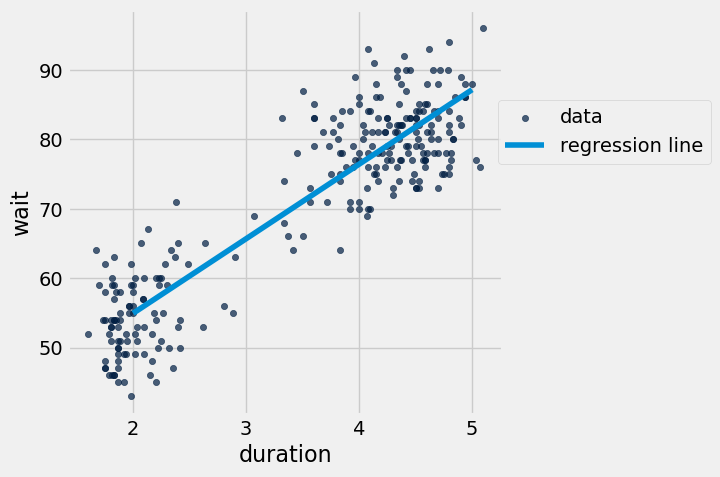

In [33]:
plot_data_and_line(faithful, "duration", "wait", 
                   [2, two_minute_predicted_waiting_time], 
                   [5, five_minute_predicted_waiting_time])

### Task 10 📍

Make predictions for the waiting time after each eruption in the `faithful` table.  (Of course, we know exactly what the waiting times were!  We are doing this so we can see how accurate our predictions are.)  Put these numbers into a column in a new table called `faithful_predictions`.  Its first row should look like this:

|duration|wait|predicted wait|
|-|-|-|
|3.6|79|72.1011|

*Hint:* Your answer can be just one line.  There is no need for a `for` loop; use array arithmetic instead.


In [34]:
predicted_wait = slope * faithful.column('duration') + intercept
faithful_predictions = faithful.with_column('predicted wait', predicted_wait)
faithful_predictions


duration,wait,predicted wait
3.6,79,72.1011
1.8,54,52.7878
3.333,74,69.2363
2.283,62,57.9702
4.533,85,82.1119
2.883,55,64.408
4.7,88,83.9037
3.6,85,72.1011
1.95,51,54.3972
4.35,85,80.1483


In [35]:
grader.check("task_10")

task_10 results: All test cases passed!
task_10 - 1 message: ✅ The labels in faithful_predictions are correct.
task_10 - 2 message: ✅ Your predicted values in faithful_predictions seem correct.

### Task 11 📍

How close were we?  Compute the *residual* for each eruption in the dataset.  The residual is the actual waiting time minus the predicted waiting time.  Add the residuals to `faithful_predictions` as a new column called `residual` and name the resulting table `faithful_residuals`.

*Hint:* Again, your code will be much simpler if you don't use a `for` loop.


In [45]:
residual = faithful.column('wait') - predicted_wait
faithful_residuals = faithful_predictions.with_column('residual', residual)
faithful_residuals


duration,wait,predicted wait,residual
3.6,79,72.1011,6.89889
1.8,54,52.7878,1.21225
3.333,74,69.2363,4.76371
2.283,62,57.9702,4.02983
4.533,85,82.1119,2.88814
2.883,55,64.408,-9.40795
4.7,88,83.9037,4.09629
3.6,85,72.1011,12.8989
1.95,51,54.3972,-3.3972
4.35,85,80.1483,4.85166


In [37]:
grader.check("task_11")

task_11 results: All test cases passed!
task_11 - 1 message: ✅ The residuals in faithful_residuals seem correct.

Here is a plot of the residuals you computed.  Each point corresponds to one eruption.  It shows how much our prediction over- or under-estimated the waiting time.

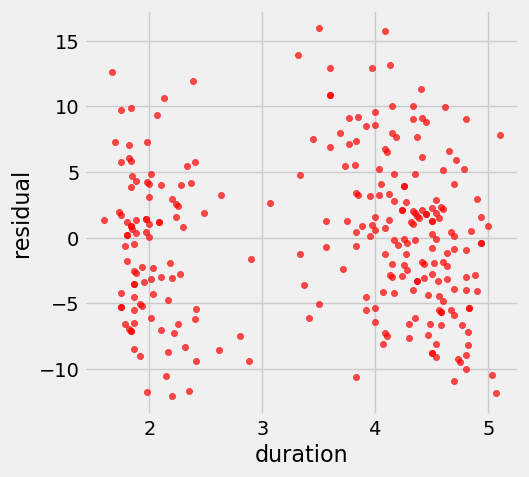

In [38]:
faithful_residuals.scatter("duration", "residual", color="r")

There isn't really a pattern in the residuals, which confirms that it was reasonable to try linear regression.  It's true that there are two separate clouds; the eruption durations seemed to fall into two distinct clusters.  But that's just a pattern in the eruption durations, not a pattern in the relationship between eruption durations and waiting times.

## How accurate are different predictions?

Earlier, you should have found that the correlation is fairly close to 1, so the line fits fairly well on the training data.  That means the residuals are overall small (close to 0) in comparison to the waiting times.

We can see that visually by plotting the waiting times and residuals together:

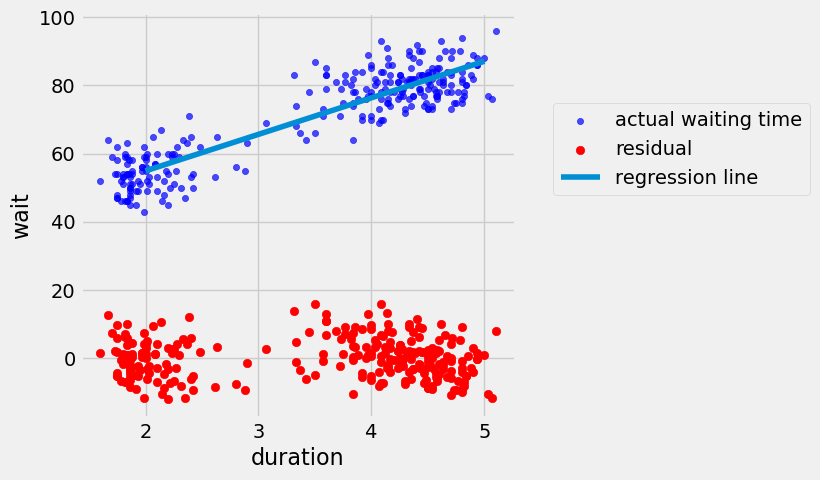

In [42]:
faithful_residuals.scatter("duration", "wait", label="actual waiting time", color="blue")
plt.scatter(faithful_residuals.column("duration"), faithful_residuals.column("residual"), label="residual", color="r")
plt.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time], label="regression line")
plt.legend(bbox_to_anchor=(1.7,.8));

However, unless you have a strong reason to believe that the linear regression model is true, you should be wary of applying your prediction model to data that are very different from the training data.

### Task 12 📍

In `faithful`, no eruption lasted exactly 0, 2.5, or 60 minutes.  Using this line, what is the predicted waiting time for an eruption that lasts 0 minutes?  2.5 minutes?  An hour?


In [43]:
zero_minute_predicted_waiting_time = slope * 0 + intercept
two_point_five_minute_predicted_waiting_time = slope * 2.5 + intercept
hour_predicted_waiting_time = slope * 60 + intercept

print_prediction(0, zero_minute_predicted_waiting_time)
print_prediction(2.5, two_point_five_minute_predicted_waiting_time)
print_prediction(60, hour_predicted_waiting_time)

After an eruption lasting 0 minutes, we predict you'll wait 33.4743970228 minutes until the next eruption.
After an eruption lasting 2.5 minutes, we predict you'll wait 60.2985005106 minutes until the next eruption.
After an eruption lasting 60 minutes, we predict you'll wait 677.252880731 minutes until the next eruption.


In [44]:
grader.check("task_12")

task_12 results: All test cases passed!
task_12 - 1 message: ✅ The zero_minute_predicted_waiting_time value seems correct.
task_12 - 2 message: ✅ The two_point_five_minute_predicted_waiting_time value seems correct.
task_12 - 3 message: ✅ The hour_predicted_waiting_time value seems correct.

### Task 13 📍🔎

<!-- BEGIN QUESTION -->

For each prediction, state whether you think it's reliable and explain your reasoning. 


The prediction for an eruption lasting 0 minutes seems unreliable because it's outside the observed range. Predictions for eruptions lasting 2.5 minutes and 60 minutes are also unreliable as they extend beyond the observed data.

<!-- END QUESTION -->

## Divide and Conquer

It appears from the scatter diagram that there are two clusters of points: one for durations around 2 and another for durations between 3.5 and 5. A vertical line at 3 divides the two clusters.

In [ ]:
faithful.scatter("duration", "wait", label="actual waiting time", color="blue")
plt.plot([3, 3], [40, 100]);

The `standardize` function from lecture appears below, which takes in a table with numerical columns and returns the same table with each column converted into standard units.

In [ ]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)  

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

### Task 14 📍

Separately compute the regression coefficients *r* for all the points with a duration below 3 **and then** for all the points with a duration above 3. To do so, create a function that computes `r` from a table and pass it two different tables of points, `below_3` and `above_3`.


In [ ]:
def reg_coeff(t):
    """Return the regression coefficient for columns 0 & 1."""
    t_su = standardize(t)
    ...

below_3 = ...
above_3 = ...
below_3_r = reg_coeff(below_3)
above_3_r = reg_coeff(above_3)
print("For points below 3, r is", below_3_r, "; for points above 3, r is", above_3_r)

In [ ]:
grader.check("task_14")

### Task 15 📍

Complete the functions `slope_of` and `intercept_of` below. 

When you're done, the functions `wait_below_3` and `wait_above_3` should each use a different regression line to predict a wait time for a duration. The first function should use the regression line for all points with duration below 3. The second function should use the regression line for all points with duration above 3.


In [ ]:
def slope_of(t, r):
    """Return the slope of the regression line for t in original units.
    
    Assume that column 0 contains x values and column 1 contains y values.
    r is the regression coefficient for x and y.
    """
    ...

def intercept_of(t, r):
    """Return the slope of the regression line for t in original units."""
    s = slope_of(t, r)
    ...
    
below_3_a = slope_of(below_3, below_3_r)
below_3_b = intercept_of(below_3, below_3_r)
above_3_a = slope_of(above_3, above_3_r)
above_3_b = intercept_of(above_3, above_3_r)

def wait_below_3(duration):
    return below_3_a * duration + below_3_b

def wait_above_3(duration):
    return above_3_a * duration + above_3_b

In [ ]:
grader.check("task_15")

The plot below shows two different regression lines, one for each cluster!

In [ ]:
faithful.scatter(0, 1)
plt.plot([1, 3], [wait_below_3(1), wait_below_3(3)])
plt.plot([3, 6], [wait_above_3(3), wait_above_3(6)]);

### Task 16 📍

Write a function `predict_wait` that takes a `duration` and returns the predicted wait time using the appropriate regression line, depending on whether the duration is below 3 or greater than (or equal to) 3.


In [ ]:
def predict_wait(duration):
    """Return the wait predicted by the appropriate one of the two regression lines above."""
    ...

In [ ]:
grader.check("task_16")

The predicted wait times for each point appear below.

In [ ]:
faithful.with_column('predicted', faithful.apply(predict_wait, 'duration')).scatter(0)

### Task 17 📍🔎

<!-- BEGIN QUESTION -->

Do you think the predictions produced by `predict_wait` would be more or less accurate than the predictions from the regression line you created in section 2? How could you tell?


_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Submit your Lab to Canvas

Once you have finished working on the lab questions, prepare to submit your work in Canvas by completing the following steps.

1. In the related Canvas Assignment page, check the requirements for a Complete score for this lab assignment.
2. Double-check that you have run the code cell near the end of the notebook that contains the command `grader.check_all()`. This command will run all of the run tests on all your responses to the auto-graded tasks marked with 📍.
3. Double-check your responses to the manually graded tasks marked with 📍🔎.
4. Select the menu items `File`, `Save and Export Notebook As...`, and `Html_embed` in the notebook's Toolbar to download an HTML version of this notebook file.
5. In the related Canvas Assignment page, click Start Assignment or New Attempt to upload the downloaded HTML file.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [46]:
grader.check_all()

task_03 results: All test cases passed!
task_03 - 1 message: ✅ Your standardized durations seem correct.
task_03 - 2 message: ✅ Your duration_std value seems correct.
task_03 - 3 message: ✅ Your wait_std value seems correct.

task_05 results: All test cases passed!
task_05 - 1 message: ✅

task_06 results: All test cases passed!
task_06 - 1 message: ✅ Your r value seems correct.

task_07 results: All test cases passed!
task_07 - 1 message: ✅ Your slope value could be correct.
task_07 - 2 message: ✅ Your slope value seems to be correct.

task_08 results: All test cases passed!
task_08 - 1 message: ✅ Your intercept is within a reasonable interval.
task_08 - 2 message: ✅ Your intercept value seems correct.

task_10 results: All test cases passed!
task_10 - 1 message: ✅ The labels in faithful_predictions are correct.
task_10 - 2 message: ✅ Your predicted values in faithful_predictions seem correct.

task_11 results: All test cases passed!
task_11 - 1 message: ✅ The residuals in faithful_res